### Machine Learning Tutorial Python - 19: Principal Component Analysis (PCA)

In [2]:
import numpy as np

In [3]:
import pandas as pd
from sklearn.datasets import  load_digits

In [4]:
digits = load_digits()

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.data.shape

(1797, 64)

In [9]:
digits0 = digits.data[0].reshape(8,8)

In [10]:
digits0

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 640x480 with 0 Axes>

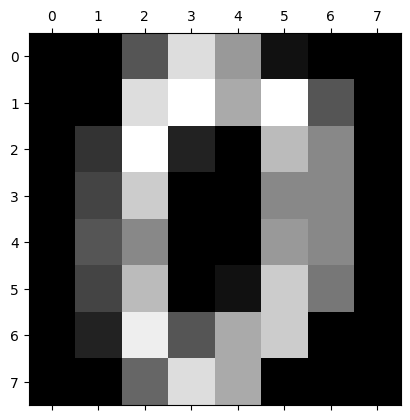

In [12]:
plt.gray()
plt.matshow(digits0)

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)

In [23]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [24]:
df['target'] = digits.target

In [25]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [20]:
df.shape

(1797, 65)

In [26]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [27]:
X = df.drop('target',axis=1)
y = df.target

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### You can use MINMAX scaler

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.2,random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
model.score(X_test,y_test)

0.9833333333333333

In [34]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(.95)
X_pca = pca.fit_transform(X)

In [37]:
X_pca.shape

(1797, 29)

In [38]:
X.shape

(1797, 64)

In [40]:
X_pca[0]

array([-1.25946645, 21.27488348, -9.46305462, 13.01418869, -7.12882278,
       -7.44065876,  3.25283716,  2.55347036, -0.58184214,  3.62569695,
        2.58595688,  1.55160708,  0.85449671, -3.33874935,  5.90658968,
        2.74359339,  0.41983691, -0.89814969,  0.70261087, -3.46211868,
        2.68084958,  1.00944951,  2.00970276,  1.29531479,  1.17887873,
        2.30058185,  3.67072108, -0.9436689 , -1.13250195])

In [41]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [42]:
pca.n_components

0.95

In [43]:
pca.n_components_

29

In [44]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_pca,y,test_size=.2,random_state=1)

In [50]:
model2 = LogisticRegression(max_iter=1000)

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
model2.fit(X_train2,y_train2)

LogisticRegression(max_iter=1000)

In [52]:
model2.score(X_test2,y_test2)

0.9638888888888889

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [54]:
model3 = LogisticRegression(max_iter=10000)

In [55]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_pca,y,test_size=.2,random_state=30)

In [57]:
model3.fit(X_train2,y_train2)

LogisticRegression(max_iter=10000)

In [58]:
model3.score(X_test2,y_test2)

0.6083333333333333

### Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Load heart disease dataset in pandas dataframe
Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
Convert text columns to numbers using label encoding and one hot encoding
Apply scaling
Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life
Solution Link

import pandas as pd

In [59]:
import pandas as pd

In [60]:
df = pd.read_csv('heart.csv')

In [61]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [62]:
df.shape

(918, 12)